# SQL Data Preprocessing 

- SQL(Structured Query Language) : 데이터 베이스 관리를 위해 사용되는 언어 
- 데이터 베이스 (DB, Data Base) : 컴퓨터에 체계적으로 정리한 데이터 
    - DBMS (DataBase Management System) : 데이터 베이스 관리 시스템 
    - RDBMS : 관계형 데이터 베이스 관리 시스템 
- 스키마 (Schema) : 데이터 베이스의 구조를 정의하는 것
    - 데이터 베이스 내 테이블, 인덱스, 테이블 간 관계, 메타 데이터 정보들을 정의 
- 쿼리(Query) : 데이터 베이스에서 특정 정보를 요청하는 명령 
    - 대소문자를 구분하지는 않지만, 대문자를 사용 (프로그래밍 언어와 구분)
- 커서(Cursor) : 데이터 베이스의 행을 순차적으로 접근 할 때 사용되는 도구 

In [1]:
import sqlite3
import pandas as pd 

In [2]:
# 데이터 베이스에 연결 (접속)
# sqlite3에서는 connect함수가 DB를 생성하는 역할  
conn = sqlite3.connect('46_DB.db')

# 커서 생성 
cursor = conn.cursor()

- SQL의 주요 쿼리문 4가지 
    - SELECT : 데이터를 조회 / 불러오기 
    - INSERT : 데이터 삽입 
    - UPDATE : 데이터 변경 
    - DELETE : 데이터 삭제 

In [3]:
# 전체 데이터 테이블을 조회 
query1 = "SELECT name FROM sqlite_master;"
# sqlite_master : SQLlite 데이터베이스의 시스템 내 여러가지 스키마 정보를 조회 
cursor.execute(query1) # execute : SQL 쿼리를 수행하는 함수

print(cursor.fetchall()) #커서의 쿼리문의 실행 결과를 모두 출력 

conn.close() # SQL처리 이후에 DB 연결을 종료 

[('order',), ('good',), ('shop',), ('log',), ('user',)]


In [7]:
conn = sqlite3.connect('46_DB.db')

# DB 내 특정 데이터를 불러오기 
# * : 모든 열 (Column)정보를 호출 
query2 = "SELECT * FROM 'order' "
df_order = pd.read_sql_query(query2, conn)
conn.close()

In [8]:
df_order

,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000
...,...,...,...,...,...
862,2018-06-11 23:47:02.003,i_Ar2GyU8xAEeQwzJm6wr60VDB6ofOpK,1065,61,29000
863,2018-06-11 23:50:42.202,49JWS9E7KuSnvv1B7uqMnsiT82ZmtRlO,502,12,12900
864,2018-06-11 23:51:54.449,wuK4KeAhonDy4KHxO8D60fFQsxoo_34c,5318,181,13200
865,2018-06-11 23:54:11.765,GU1JdCza2vj7N-0_YN3JOftW7SRXkWDi,2989,19,18900


In [9]:
# 특정 열을 조건을(WHERE) 걸어 추출하기 
conn = sqlite3.connect('46_DB.db')

query3 = "SELECT timestamp, price, goods_id  FROM 'order' WHERE price > 50000"
pd.read_sql_query(query3, conn)

,timestamp,price,goods_id
0,2018-06-11 00:42:22.451,54000,6061
1,2018-06-11 00:44:34.438,51000,499
2,2018-06-11 01:45:22.481,55000,4231
3,2018-06-11 02:29:07.664,79000,3457
4,2018-06-11 03:54:32.837,52000,6369
5,2018-06-11 04:49:22.687,68400,1764
6,2018-06-11 10:29:24.083,54000,6061
7,2018-06-11 10:48:17.339,54000,6061
8,2018-06-11 10:56:55.197,54000,2603
9,2018-06-11 11:45:40.070,83000,6503


In [10]:
conn.close()

- DB 파일 생성 및 연결 

In [11]:
conn = sqlite3.connect('telemarket.db')

In [12]:
df2 = pd.read_csv('38_Data.csv')
df2.shape

(41188, 16)

In [14]:
# 불러온 df2 데이터에서 10000 데이터만 추출해, DB에 table형태로 저장 
df3 = df2.iloc[:10000]

In [15]:
df3.to_sql('log', conn, if_exists='replace', index=False)
conn.commit()

In [16]:
conn.close()

- 저장한 데이터 파일 확인 

In [17]:
conn = sqlite3.connect('telemarket.db')

query4 = "SELECT * FROM 'log' "
pd.read_sql_query(query4, conn)

,Unnamed: 0,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락일
0,0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,None,0,no,87,2022-09-29
1,1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,None,0,no,88,2022-09-29
2,2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,None,0,no,89,2022-09-29
3,3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,None,0,no,90,2022-09-29
4,4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,None,0,no,91,2022-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,39,산업노동자,결혼,중졸,미확인,대출있음,없음,유선전화,125,3,None,0,no,212,2023-08-08
9996,9996,36,기술자,결혼,전문학교,없음,대출있음,없음,유선전화,158,2,None,0,no,213,2023-08-08
9997,9997,33,서비스종사자,미혼,검정고시,없음,미확인,미확인,유선전화,179,4,None,0,no,214,2023-08-08
9998,9998,41,기술자,결혼,석박사,미확인,대출있음,없음,유선전화,649,3,None,0,yes,215,2023-08-08


In [20]:
# DB 내 기존의 Table에 새로운 데이터 Table (열이 일치하는) 추가 
df4 = df2.iloc[10000:]

In [21]:
df4.to_sql('log', conn, if_exists='append', index=False)
conn.commit()

In [22]:
query5 = "SELECT * FROM 'log'"
df5 = pd.read_sql_query(query5, conn)
print(df5.shape)
df5.head()

(41188, 16)


,Unnamed: 0,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락일
0,0,56,주부,결혼,중졸,없음,없음,없음,유선전화,261,1,NaN,0,no,87,2022-09-29
1,1,57,서비스종사자,결혼,전문학교,미확인,없음,없음,유선전화,149,1,NaN,0,no,88,2022-09-29
2,2,37,서비스종사자,결혼,전문학교,없음,대출있음,없음,유선전화,226,1,NaN,0,no,89,2022-09-29
3,3,40,회사원,결혼,검정고시,없음,없음,없음,유선전화,151,1,NaN,0,no,90,2022-09-29
4,4,56,서비스종사자,결혼,전문학교,없음,없음,대출있음,유선전화,307,1,NaN,0,no,91,2022-09-29


- 한 줄 씩 DB내 Table에 데이터를 추가 하고자 할 때  

In [23]:
age = 30 
jobs = '강사'
p_days = 2
c1 = 'yes'
card = 33
date = "2024-04-19"

In [24]:
cursor = conn.cursor()

In [25]:
query6 = "INSERT INTO log (연령, 직업군, p_days, 계약여부, 카드종류, 연락일) VALUES (?,?,?,?,?,?)"
cursor.execute(query6, (age, jobs, p_days, c1, card, date) )
conn.commit() 

In [29]:
pd.read_sql_query(query5, conn).tail(2)

,Unnamed: 0,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락일
41187,41187.0,74,은퇴,결혼,석박사,없음,대출있음,없음,휴대폰,239.0,3.0,NaN,1.0,no,102,2023-02-15
41188,NaN,30,강사,None,None,None,None,None,None,NaN,NaN,2.0,NaN,yes,33,2024-04-19


- INSERT INTO table이름, (입력하고자 하는 값들의 column명) VALUE (입력하고자하는 값)
- 입력하려고 하는 값에 ? 기호를 넣은 이유는, Injection공격으로부터 안전하게 값을 DB에 넣기 위함 
    - SQL Injection : 사용자의 입력값을 조작/가로채 서버의 데이터베이스를 공격 

In [30]:
# DB 내 정보를 삭제 ( 한번 지우면 되돌릴 수 없음! )
query7 = 'DELETE FROM log WHERE contact IS NULL'
cursor.execute(query7)
conn.commit()

In [31]:
pd.read_sql_query(query5, conn).tail(3)

,Unnamed: 0,연령,직업군,결혼여부,학력,신용카드소지여부,주택대출여부,개인대출여부,contact,통화시간,연락시도횟수,p_days,과거통화횟수,계약여부,카드종류,연락일
41185,41185,56,은퇴,결혼,대졸학사,없음,대출있음,없음,휴대폰,189,2,NaN,0,no,100,2023-02-15
41186,41186,44,기술자,결혼,석박사,없음,없음,없음,휴대폰,442,1,NaN,0,yes,101,2023-02-15
41187,41187,74,은퇴,결혼,석박사,없음,대출있음,없음,휴대폰,239,3,NaN,1,no,102,2023-02-15


In [32]:
conn.close()

- UDATE : DB내 정보를 변경 

In [33]:
conn = sqlite3.connect('46_DB.db')
cursor = conn.cursor()

In [36]:
query8 = "SELECT * FROM 'user'"
pd.read_sql_query(query8, conn).head(1)

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,43


In [37]:
# 맨 위의 User의 정보를 Update 
user_id = '--PYPMX8QWg0ioT5zfORmU-S5Lln0lot'
os ='iOS'
age = 25

In [38]:
cursor.execute("UPDATE user SET os = ?, age =? WHERE user_id = ?",
               (os, age, user_id))
conn.commit()

In [39]:
pd.read_sql_query(query8, conn).head(1)

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,iOS,25


In [40]:
# 모든 유저의 연령을 1씩 증가 Update 
cursor.execute("UPDATE user SET age = age + 1 ")
conn.commit()

In [41]:
pd.read_sql_query("SELECT * FROM user", conn)

,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,iOS,26
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,34
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,19
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,44
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,45
...,...,...,...
9995,zymqXr4nryoIrj8e9ToeLoNbnOfCvcsM,And,20
9996,zyugPCF7YB6Fksn51adQa3CpAIn1SwIf,And,31
9997,zz-aNy7UWfvyrZxO4Fs4K5ewmqZVaMOs,iOS,31
9998,zznj-LHhddVvuzZmbZpw6MSylLO64982,And,30


**크롤링한 데이터를 이용해 DB를 구성**

In [42]:
from selenium.webdriver import Chrome
from bs4 import BeautifulSoup

In [43]:
driver = Chrome()
driver.get('https://search.hankyung.com/search/news?query=%EA%B8%88%EC%9C%B5&mediaid_clust=HKPAPER,HKCOM')

In [45]:
html = driver.page_source
html_tag = BeautifulSoup(html)

In [48]:
title = html_tag.find_all('em', class_='tit')
title_list = [x.get_text() for x in title]

In [51]:
text = html_tag.find_all('p', class_ ='txt')
text_list = [x.get_text() for x in text]

In [53]:
df6 = pd.DataFrame(data={'title':title_list, 'text':text_list})

In [54]:
conn = sqlite3.connect('article.db')
df6.to_sql('finance', conn, if_exists='replace',index=False)
conn.commit()

In [56]:
pd.read_sql_query("SELECT * FROM finance",conn)

,title,text
0,"최상목 부총리 ""23조 모험자본으로 청정에너지 지원""",... 초청받았다. 19일 기획재정부는 최 부총리의 G20 재무장관·중앙은행 총재...
1,"옛 중앙일보 빌딩, 36층 업무시설로 재개발…""첫 통합심의 통과""",... 등 조경 특화공간을 확보했다. 앞서 2022년 8월 통과한 건축심의안 대비 ...
2,새 금통위원에 이수형·김종화…하반기 금리 인하 기대 커지나 [강진규의 BOK워치],이수형 서울대 국제대학원 교수와 김종화 전 한국은행 부총재보가 한은 금융통화위원에 ...
3,전화 한 통으로 국민은행·KB증권·KB카드 상담 한 번에,KB금융그룹이 19일 금융권 최초로 계열사 간 고객센터 연결이 가능한 ‘KB Lin...
4,회원전용국민연금 늘리려다 '날벼락'…노후 챙기면서 '건보료 폭탄' 피할 방법은,... 보험료 납입으로 가입기간이 인정(10년 미만)되는 만큼 은퇴 후 받을 수 있...
5,"예금 금리 20배나 올렸는데…日, '예상 밖' 상황에 당혹 [김일규의 재팬워치]","... 세상’을 만났지만, 기업과 개인은 별 움직임이 없다. 오히려 외환시장에서 금..."
6,1분기 단기사채 발행액 193조…전년비 11% 줄어,... 발행액의 91.3%를 차지했다. 만기별로는 3개월물 이하 발행액이 192조원...
7,"""비트코인 2억 간다면서요""…몰빵한 개미들 '패닉' [신민경의 테마록]","... ""이미 반감기 재료가 시장에 반영돼 있을 수 있어, 비트코인이 15~25% ..."
8,"""넷플 가입자 폭증"" 자랑하더니…주가 4%대 하락한 이유는",... 나타냈다. 넷플릭스는 18일(현지시간) 뉴욕증시 장 마감 후 올해 1분기 ...
9,"""1020 소비자 겨냥""…LG유플러스 '갤럭시 버디3' 단독 출시","... FHD+(FULL+HD) 대화면 디스플레이, 최대 5000만 화소 트리플 카..."


In [57]:
# DB 내 Table 자체를 삭제 
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS finance')
conn.commit()

In [61]:
cursor.execute("SELECT name FROM sqlite_master;")
print(cursor.fetchall())

[]


In [63]:
driver.quit()

**한 페이지 씩 추가하며 DB를 구성**

In [62]:
import time 
from tqdm import tqdm

In [64]:
driver = Chrome()
conn = sqlite3.connect('article.db')

url = 'https://search.hankyung.com/search/news?query=%EA%B8%88%EC%9C%B5&mediaid_clust=HKPAPER,HKCOM&page=1'
driver.get(url)

index_num = 0 

for i in tqdm(range(2, 20 +1)):
    try:
        driver.implicitly_wait(10)
        time.sleep(1)
        html = driver.page_source
        html_tag = BeautifulSoup(html)
        
        # 기사 제목 및 기사 내용을 수집 
        title = html_tag.find_all('em', class_='tit')
        title_list = [x.get_text() for x in title] 
        
        text = html_tag.find_all('p', class_ ='txt')
        text_list = [x.get_text() for x in text]
        
        index_list = [] 
        for k in range(len(title_list)):
            index_num += 1
            index_list.append(index_num)
        
        dfn = pd.DataFrame(data={'article_num':index_list, 
                                 'title':title_list, 'text':text_list})
        dfn.to_sql('finance', conn, if_exists='append',index=False)
    except Exception as e: 
        print(e)
    finally:
        conn.commit()
        url_next = 'https://search.hankyung.com/search/news?query=%EA%B8%88%EC%9C%B5&mediaid_clust=HKPAPER,HKCOM&page='+str(i)
        driver.get(url_next)
        time.sleep(1)

driver.quit()
conn.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:59<00:00,  3.15s/it]


In [65]:
conn = sqlite3.connect('article.db')
cursor = conn.cursor()

query11 = 'SELECT * FROM finance;'

df_article = pd.read_sql_query(query11,conn)
df_article

,article_num,title,text
0,1,"DGB금융그룹, 금융권 최초 사외이사 교육 프로그램 도입",DGB금융그룹은 지난 18일 금융권 최초로 그룹 전 계열사 사외이사의 전문성 제고와...
1,2,"최상목 부총리 ""23조 모험자본으로 청정에너지 지원""",... 초청받았다. 19일 기획재정부는 최 부총리의 G20 재무장관·중앙은행 총재...
2,3,"옛 중앙일보 빌딩, 36층 업무시설로 재개발…""첫 통합심의 통과""",... 등 조경 특화공간을 확보했다. 앞서 2022년 8월 통과한 건축심의안 대비 ...
3,4,새 금통위원에 이수형·김종화…하반기 금리 인하 기대 커지나 [강진규의 BOK워치],이수형 서울대 국제대학원 교수와 김종화 전 한국은행 부총재보가 한은 금융통화위원에 ...
4,5,전화 한 통으로 국민은행·KB증권·KB카드 상담 한 번에,KB금융그룹이 19일 금융권 최초로 계열사 간 고객센터 연결이 가능한 ‘KB Lin...
...,...,...,...
185,186,"""품격이 다른 종합자산관리, 삼성생명 WM팀이 함께합니다""",... 삼성생명 WM팀이다. 삼성생명 WM팀은 부유층 고객 대상 자산관리 컨설팅 ...
186,187,"'XBRL' 공시 분류법, ESG 산업 재편한다",... 활용할 수 있을 것으로 기대한다. IFRS재단뿐 아니라 유럽연합(EU) 지속...
187,188,부동산 운용사 적자 늘어도…유경PSG·DWS는 '선방',지난해 부동산 대체투자 자산운용사들의 적자 폭이 크게 불었다. 팍팍한 업계 분위기에...
188,189,매출 70억 IT 솔루션업체 매물로,... 인수합병(M&A) 시장에 매물로 나왔다. 이 회사는 지분 100% 매각을 추...


- **이미지와 같은 파일을 DB에 저장하고자 할 때**
- BLOB(Binary Large OBject) 타입을 사용 
- BLOB 큰 바이너리 데이터를 저장하기 위한 데이터 타입 
- 주로 이미지, 오디오, 비디오 파일과 같은 형태의 대용량 멀티미디어 파일을 데이터 베이스 내 저장할 때 사용 
    - BLOB 특징 
        - 대용량 저장 가능 <-> 많은 량의 데이터로 인한 시간 저하 
        - 비정형 데이터 처리가 가능 

In [66]:
driver = Chrome()
url = 'http://gs25.gsretail.com/gscvs/ko/products/event-goods'
driver.get(url)

In [67]:
html = driver.page_source
html_tag = BeautifulSoup(html)

In [72]:
# 이미지 정보 주소를 추출 
image = html_tag.find_all('p', class_='img')
image_list = [x.find('img')['src'] for x in image]

In [73]:
import requests

In [75]:
# 한장의 이미지를 Binary 형태로 변환 
# requests.get(image_list[0]).content

In [76]:
image_binary = [requests.get(x).content for x in image_list]

In [77]:
# 이미지를 집어넣을 DB 구성 
conn = sqlite3.connect('image.db')
cursor = conn.cursor()

In [79]:
# BLOB 파일 타입은, 직접 Table 내 해당 타입의 Column을 생성 
cursor.execute('''
CREATE TABLE IF NOT EXISTS images (
    id INTEGER PRIMARY KEY,
    image_data BLOB NOT NULL
)
''')
conn.commit()

In [80]:
for i in image_binary:
    cursor.execute('INSERT INTO images (image_data) VALUES (?)', (i, ))

In [81]:
conn.commit()

- 이미지를 불러와 확인 

In [82]:
from PIL import Image
import io

In [83]:
cursor.execute('SELECT image_data FROM images')
result = cursor.fetchone()

In [84]:
conn.close()

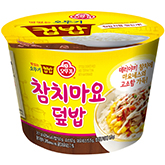

In [86]:
Image.open( io.BytesIO(result[0]))